In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np
#from pandas_profiling import ProfileReport

In [2]:
trans_2018 = pd.read_excel('../data/Transaction Data.xlsx', sheet_name= 'Transactions18')
trans_2019 = pd.read_excel('../data/Transaction Data.xlsx', sheet_name= 'Transactions19')

In [3]:
trans_2019 = trans_2019.rename(columns={'sales_12M': 'sales_2019', 'new_Fund_added_12M':'new_fund_2019'})

In [4]:
full_df = pd.merge(trans_2018,trans_2019, on = 'CONTACT_ID' )

In [5]:
full_df.head()


,CONTACT_ID,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,...,aum_P_CEF,aum_P_ETF,aum_P_MF,aum_P_SMA,aum_P_UCITS,aum_P_UIT,refresh_date_x,sales_2019,new_fund_2019,refresh_date_y
0,0047433,21.0,38.0,NaN,1.0,5.0,5.0,NaN,1.0,2.0,...,0.0,0.0,122866.04,114614.07,0.0,0.0,2018-12-31,18633.105,NaN,2019-12-31
1,4461312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,19629.00,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
2,4491079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1758.70,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31
3,0107408,20.0,NaN,2.0,NaN,1.0,NaN,1.0,NaN,1.0,...,0.0,0.0,57943.00,0.00,0.0,0.0,2018-12-31,93212.000,1.0,2019-12-31
4,85101140503769936458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,-8573.59,0.00,0.0,0.0,2018-12-31,NaN,NaN,2019-12-31


In [6]:
firms_a = pd.read_excel('../data/Firm Information.xlsx', sheet_name= 'Asset fund summary', skiprows= 1)

In [7]:
firms_rep_summary = pd.read_excel('../data/Firm Information.xlsx', sheet_name= 'Rep summary')

In [8]:
firms_rep_summary = firms_rep_summary.rename({'Contact ID':'CONTACT_ID'}, axis = 1)

In [9]:
firms_rep_summary.head()

,CONTACT_ID,CustomerID,Firm ID,Office ID,Channel,Sub channel,Firm name
0,0000286,1,1948520,17993101120,National Broker-Dealer,NACS,Morgan Stanley Wealth Management
1,0000422,2,1688552,85202111664692445495,National Broker-Dealer,NACS,"UBS Financial Services, Inc."
2,0000508,3,1567450,15674503441,National Broker-Dealer,NACS,Merrill Lynch
3,0000604,4,0022885,85102132106001250782,Independent Dealer,IBD,LPL Financial LLC
4,0000657,5,1567450,15674501882,National Broker-Dealer,NACS,Merrill Lynch


In [12]:
full_df = pd.merge(full_df, firms_rep_summary, on = 'CONTACT_ID')

In [13]:
missing_diagrams = {
    'heatmap' : True , 'dendrogram' : True, 'matrix' : True, 'bar' : True ,
}

In [14]:
profile = ProfileReport(full_df, title ='Nuveen Profile report', missing_diagrams = missing_diagrams, minimal = True)

NameError: name 'ProfileReport' is not defined

In [15]:
profile.to_file(output_file = "nuveen_profiling_initial.html")

NameError: name 'profile' is not defined

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='no_of_sales_12M_1'>

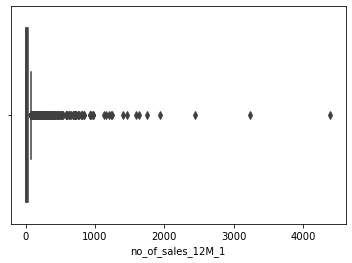

In [10]:
sns.boxplot(full_df['no_of_sales_12M_1'])

In [11]:
full_df['no_of_sales_12M_1'].fillna(0, inplace = True)

In [12]:
select_columns = [i for i in full_df.columns if i.lower().startswith('no_of')]

In [13]:
select_columns

['no_of_sales_12M_1',
 'no_of_Redemption_12M_1',
 'no_of_sales_12M_10K',
 'no_of_Redemption_12M_10K',
 'no_of_funds_sold_12M_1',
 'no_of_funds_redeemed_12M_1',
 'no_of_fund_sales_12M_10K',
 'no_of_funds_Redemption_12M_10K',
 'no_of_assetclass_sold_12M_1',
 'no_of_assetclass_redeemed_12M_1',
 'no_of_assetclass_sales_12M_10K',
 'no_of_assetclass_Redemption_12M_10K',
 'No_of_fund_curr',
 'No_of_asset_curr']

In [14]:
for i in full_df.columns:
    if i.lower().startswith('no_of'):
        full_df[i].fillna(0, inplace = True)

In [15]:
full_df[select_columns].describe()


,no_of_sales_12M_1,no_of_Redemption_12M_1,no_of_sales_12M_10K,no_of_Redemption_12M_10K,no_of_funds_sold_12M_1,no_of_funds_redeemed_12M_1,no_of_fund_sales_12M_10K,no_of_funds_Redemption_12M_10K,no_of_assetclass_sold_12M_1,no_of_assetclass_redeemed_12M_1,no_of_assetclass_sales_12M_10K,no_of_assetclass_Redemption_12M_10K,No_of_fund_curr,No_of_asset_curr
count,10005.000000,10005.000000,10005.000000,10005.000000,10005.00000,10005.000000,10005.000000,10005.000000,10005.000000,10005.000000,10005.000000,10005.000000,10005.000000,10005.000000
mean,20.082159,20.976412,2.420090,1.856372,1.35992,1.544328,0.570315,0.607896,0.786207,0.906747,0.378711,0.422189,2.144128,0.920040
std,98.440409,191.551634,14.534801,12.233707,2.37988,2.467777,1.329914,1.358727,1.004772,1.046786,0.709088,0.746622,3.136572,1.042386
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,8.000000,8.000000,1.000000,1.000000,2.00000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000
max,4395.000000,12152.000000,986.000000,883.000000,32.00000,33.000000,19.000000,21.000000,5.000000,5.000000,5.000000,4.000000,32.000000,6.000000


In [16]:
full_df['AUM'].fillna(0, inplace = True)

In [23]:
for i in full_df.columns:
    if i.lower().startswith('aum'):
        #print(full_df[i].count()) #contains the count of elements in each column
        full_df[i].fillna(0, inplace = True)

In [24]:
full_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 47 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CONTACT_ID                           10005 non-null  object        
 1   no_of_sales_12M_1                    10005 non-null  float64       
 2   no_of_Redemption_12M_1               10005 non-null  float64       
 3   no_of_sales_12M_10K                  10005 non-null  float64       
 4   no_of_Redemption_12M_10K             10005 non-null  float64       
 5   no_of_funds_sold_12M_1               10005 non-null  float64       
 6   no_of_funds_redeemed_12M_1           10005 non-null  float64       
 7   no_of_fund_sales_12M_10K             10005 non-null  float64       
 8   no_of_funds_Redemption_12M_10K       10005 non-null  float64       
 9   no_of_assetclass_sold_12M_1          10005 non-null  float64       
 10  no_of_asse

In [25]:
full_df['AUM'].describe()

count    1.000500e+04
mean     3.405775e+05
std      3.246426e+06
min     -7.713610e+07
25%     -2.927447e+04
50%      2.391812e+01
75%      1.484115e+05
max      2.232411e+08
Name: AUM, dtype: float64

In [26]:
full_df['AUM'] = full_df['AUM'].apply(lambda x: x if x >=0 else 0)

In [27]:
full_df['AUM'].describe()

count    1.000500e+04
mean     4.850002e+05
std      2.993438e+06
min      0.000000e+00
25%      0.000000e+00
50%      2.391812e+01
75%      1.484115e+05
max      2.232411e+08
Name: AUM, dtype: float64

In [28]:
for i in full_df.columns:
    if i.startswith('aum'):
        full_df.drop(i, axis= 1,  inplace = True)

In [29]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 31 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   CONTACT_ID                           10005 non-null  object        
 1   no_of_sales_12M_1                    10005 non-null  float64       
 2   no_of_Redemption_12M_1               10005 non-null  float64       
 3   no_of_sales_12M_10K                  10005 non-null  float64       
 4   no_of_Redemption_12M_10K             10005 non-null  float64       
 5   no_of_funds_sold_12M_1               10005 non-null  float64       
 6   no_of_funds_redeemed_12M_1           10005 non-null  float64       
 7   no_of_fund_sales_12M_10K             10005 non-null  float64       
 8   no_of_funds_Redemption_12M_10K       10005 non-null  float64       
 9   no_of_assetclass_sold_12M_1          10005 non-null  float64       
 10  no_of_asse

In [30]:
for i in full_df.columns:
    if i.startswith('refresh_date'):
        full_df.drop(i, axis= 1,  inplace = True)

In [31]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CONTACT_ID                           10005 non-null  object 
 1   no_of_sales_12M_1                    10005 non-null  float64
 2   no_of_Redemption_12M_1               10005 non-null  float64
 3   no_of_sales_12M_10K                  10005 non-null  float64
 4   no_of_Redemption_12M_10K             10005 non-null  float64
 5   no_of_funds_sold_12M_1               10005 non-null  float64
 6   no_of_funds_redeemed_12M_1           10005 non-null  float64
 7   no_of_fund_sales_12M_10K             10005 non-null  float64
 8   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 9   no_of_assetclass_sold_12M_1          10005 non-null  float64
 10  no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 11  no_of_assetclass_sales_12M_1

In [32]:
for i in full_df.columns:
    if i.lower().startswith('sales'):
        full_df[i] = full_df[i].apply(lambda x: x if x >=0 else 0)
    

In [33]:
full_df['sales_12M'].describe()

count    1.000500e+04
mean     1.730954e+05
std      1.129624e+06
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.155719e+04
max      5.434650e+07
Name: sales_12M, dtype: float64

In [34]:
for i in full_df.columns:
    if i.lower().startswith('new'):
        full_df[i] = full_df[i].apply(lambda x: x if x >=0 else 0)

In [35]:
full_df['new_Fund_added_12M'].describe()

count    10005.000000
mean         0.492554
std          1.199372
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         16.000000
Name: new_Fund_added_12M, dtype: float64

<AxesSubplot:>

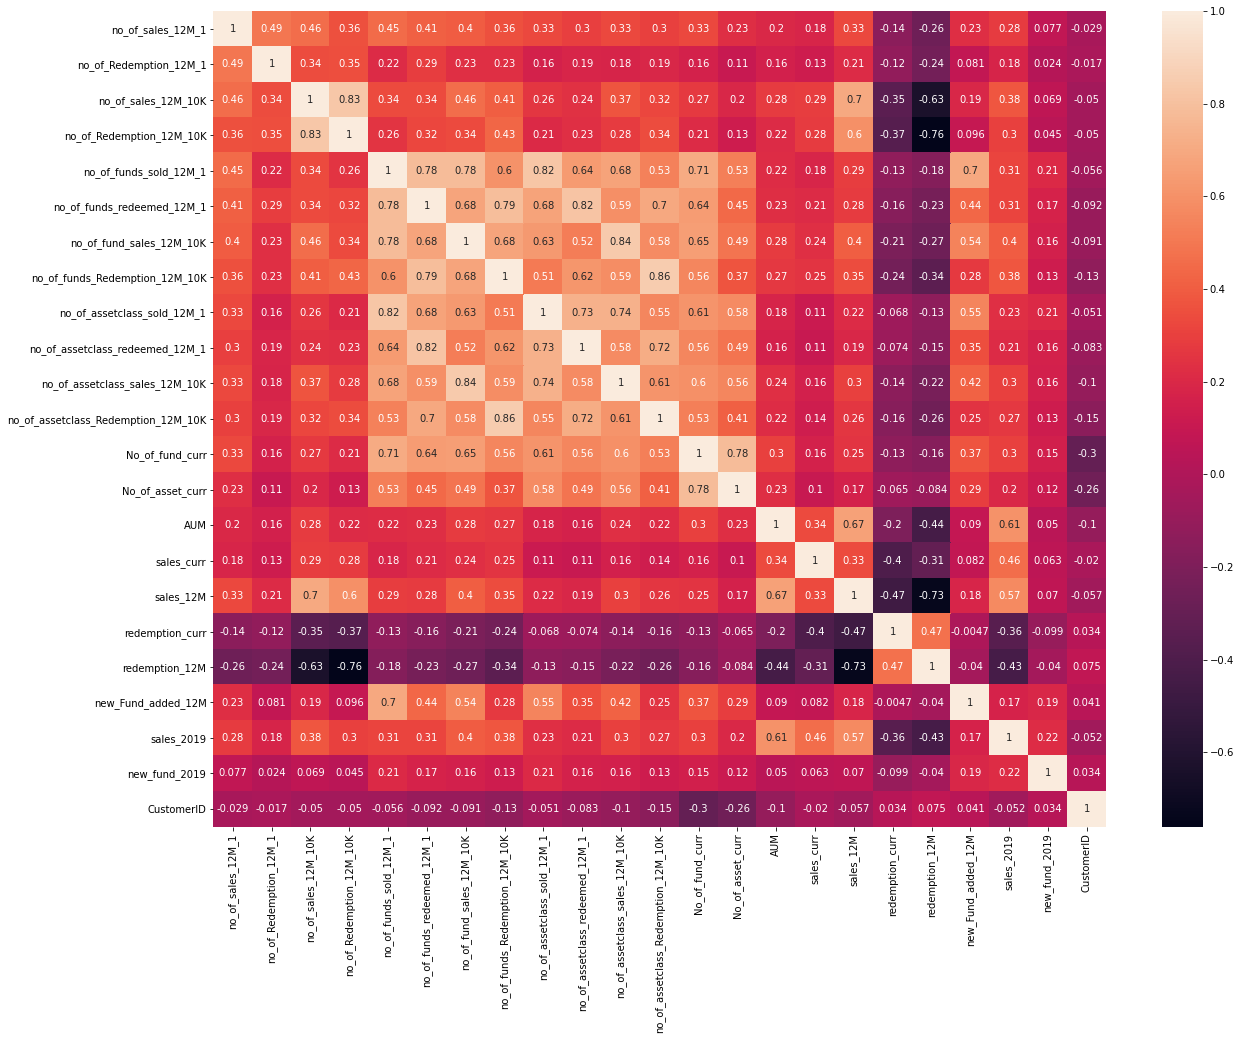

In [36]:
plt.figure(figsize = (20,15))
sns.heatmap(full_df.corr(), annot = True)

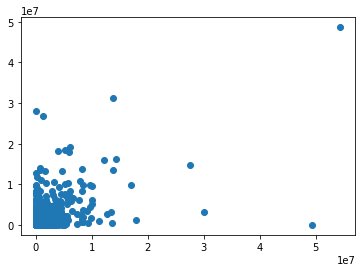

In [37]:
plt.scatter(full_df['sales_12M'], full_df['sales_2019'])


In [38]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CONTACT_ID                           10005 non-null  object 
 1   no_of_sales_12M_1                    10005 non-null  float64
 2   no_of_Redemption_12M_1               10005 non-null  float64
 3   no_of_sales_12M_10K                  10005 non-null  float64
 4   no_of_Redemption_12M_10K             10005 non-null  float64
 5   no_of_funds_sold_12M_1               10005 non-null  float64
 6   no_of_funds_redeemed_12M_1           10005 non-null  float64
 7   no_of_fund_sales_12M_10K             10005 non-null  float64
 8   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 9   no_of_assetclass_sold_12M_1          10005 non-null  float64
 10  no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 11  no_of_assetclass_sales_12M_1

In [39]:
full_df['redemption_curr'].head()

0   -1496.745
1         NaN
2         NaN
3         NaN
4         NaN
Name: redemption_curr, dtype: float64

In [40]:
for i in full_df.columns:
    if i.lower().startswith('redemption'):
        full_df[i].fillna(0, inplace = True)

In [41]:
full_df['redemption_12M'].head()

0   -102496.165
1         0.000
2         0.000
3         0.000
4         0.000
Name: redemption_12M, dtype: float64

In [42]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10004
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   CONTACT_ID                           10005 non-null  object 
 1   no_of_sales_12M_1                    10005 non-null  float64
 2   no_of_Redemption_12M_1               10005 non-null  float64
 3   no_of_sales_12M_10K                  10005 non-null  float64
 4   no_of_Redemption_12M_10K             10005 non-null  float64
 5   no_of_funds_sold_12M_1               10005 non-null  float64
 6   no_of_funds_redeemed_12M_1           10005 non-null  float64
 7   no_of_fund_sales_12M_10K             10005 non-null  float64
 8   no_of_funds_Redemption_12M_10K       10005 non-null  float64
 9   no_of_assetclass_sold_12M_1          10005 non-null  float64
 10  no_of_assetclass_redeemed_12M_1      10005 non-null  float64
 11  no_of_assetclass_sales_12M_1

In [43]:
full_df.to_csv('../data/cleaned_eda_data.csv')